In [2]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense

In [3]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [4]:
features = ["Pclass", "Sex", "SibSp", "Parch","Age", "Embarked"]

titanic_train.Age = titanic_train.Age.fillna(titanic_train.Age.median())
titanic_test.Age = titanic_test.Age.fillna(titanic_test.Age.median())

X = pd.get_dummies(titanic_train[features])
X_test = pd.get_dummies(titanic_test[features])
y = titanic_train["Survived"]


In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

X_train_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)


In [8]:
model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train_scaled, y, validation_split=0.2, batch_size=32, epochs =30)

Epoch 1/30
23/23 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.8216 - val_loss: 0.3492 - val_accuracy: 0.8547
Epoch 2/30
23/23 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.8202 - val_loss: 0.3508 - val_accuracy: 0.8603
Epoch 3/30
23/23 [==============================] - 0s 3ms/step - loss: 0.4163 - accuracy: 0.8188 - val_loss: 0.3468 - val_accuracy: 0.8547
Epoch 4/30
23/23 [==============================] - 0s 3ms/step - loss: 0.4164 - accuracy: 0.8272 - val_loss: 0.3478 - val_accuracy: 0.8547
Epoch 5/30
23/23 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8258 - val_loss: 0.3467 - val_accuracy: 0.8603
Epoch 6/30
23/23 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8202 - val_loss: 0.3472 - val_accuracy: 0.8547
Epoch 7/30
23/23 [==============================] - 0s 3ms/step - loss: 0.4135 - accuracy: 0.8258 - val_loss: 0.3456 - val_accuracy: 0.8547
Epoch 8/30
23/23 [==

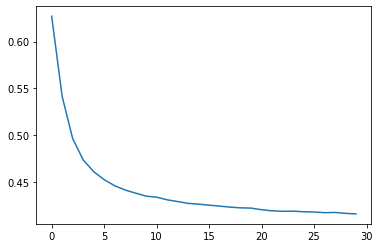

In [10]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot();